<a href="https://colab.research.google.com/github/pscabral/Prezunic/blob/main/ModeloFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Horea94/Fruit-Images-Dataset

Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385858, done.
remote: Counting objects: 100% (8693/8693), done.
remote: Compressing objects: 100% (8659/8659), done.
remote: Total 385858 (delta 37), reused 8688 (delta 34), pack-reused 377165
Receiving objects: 100% (385858/385858), 2.10 GiB | 7.71 MiB/s, done.
Resolving deltas: 100% (1197/1197), done.
Updating files: 100% (90503/90503), done.


In [67]:
import matplotlib.pyplot as plt
from glob import glob

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
train_path = "../content/Fruit-Images-Dataset/Training"
test_path = "../content/Fruit-Images-Dataset/Test"
# a sample apple braeburn image

img = load_img(train_path + "/Apple Braeburn/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [72]:
# image matrix shape with rgb
x = img_to_array(img)
x.shape

(100, 100, 3)

In [73]:
# how many classes are there in dataset?
classNames = glob(train_path + "/*")
numberOfClass = len(classNames)
print("The number of class:", numberOfClass)

The number of class: 131


In [74]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output layer
model.add(Activation("softmax"))

In [75]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [76]:
batch_size = 32

In [77]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2], batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 50,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

In [89]:
def save_model(fileName):
    model.save_weights(fileName + ".h5")

    import json
    with open(fileName + ".json", "w") as f:
        json.dump(history.history, f)

def load_json(fileName):
    import codecs
    import json
    with codecs.open(fileName + ".json", "r", encoding="utf-8") as f:
        h = json.loads(f.read())

    return h

# Descomente estas linhas para salvar e carregar o modelo
save_model("/content/test")
h = load_json("/content/test")

In [ ]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [92]:
# import vgg16 model from keras library
from keras.applications.vgg16 import VGG16

vgg = VGG16()

In [ ]:
vgg.summary()

In [ ]:
# all layers of vgg16
vgg_layer_list = vgg.layers
vgg_layer_list

In [ ]:
# drop last dense layer that has 1000 class-prediction layers
model = Sequential()
for i in range(len(vgg_layer_list)-3):
    model.add(vgg_layer_list[i])
model.summary()

In [ ]:
# freeze layers
for layers in model.layers:
    layers.trainable = False

model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))

# adding last layer as a trainable layer
model.add(Dense(numberOfClass, activation = "softmax"))
# last model's summary
model.summary()

In [97]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

In [ ]:
# re-generate images with (224, 224) target size
train_generator = train_datagen.flow_from_directory(train_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = batch_size, color_mode = "rgb", class_mode = "categorical")

history = model.fit_generator(generator = train_generator,
                    steps_per_epoch = 1600 // batch_size,
                    epochs = 30,
                    validation_data = test_generator,
                    validation_steps = 800 // batch_size)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


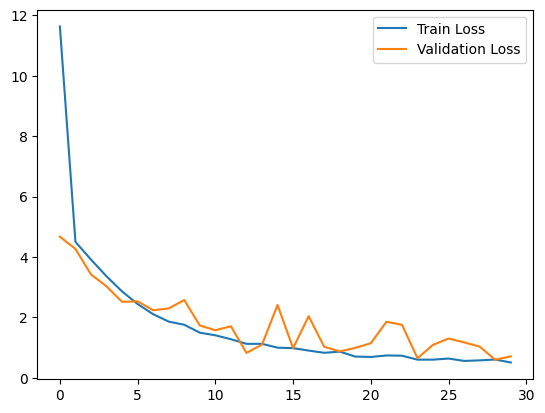

In [99]:
print(history.history.keys())
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

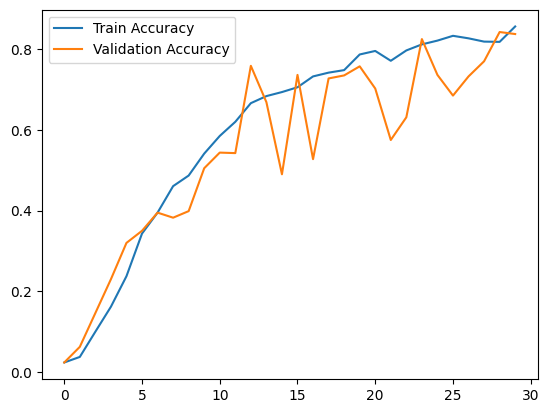

In [100]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()